
# Perceptrón Simple


## Clase

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron() :

    def __init__(self, input_size, learning_rate = 0.01) :
        self.w = np.random.randn(input_size, 1)
        self.b = np.random.randn(1)
        self.learning_rate = learning_rate

        self.error_history = []
        self.accuracy_history = []
        self.training_data = None

    def evaluar_cota(self, x, y, w, steps) :

        R = (np.max(np.linalg.norm(x, axis=1))) ** 2 # R^2
        rho = np.min(y * (x @ w).flatten()) ** 2 # ρ^2
        nsq_w = np.linalg.norm(w, ord = 2) ** 2 # ||w*||^2

        # bound = R / (rho * nsq_w)
        bound = (R * nsq_w) / rho

        print("\n" + "="*50)
        print("EVALUACIÓN DE LA COTA TEÓRICA")
        print("="*50)
        print(f"R^2: {R:.4f}")
        print(f"ρ^2: {rho:.4f}")
        print(f"||w*||^2: {nsq_w:.4f}")
        print(f"Cota teórica: {bound:.2f}")
        print(f"¿Se cumple? {'Sí' if steps <= bound else 'No'}")
    
    def linear_sep_data(n = 100, p = 2):
        x = np.random.uniform(-1, 1, (n, p)) # Datos aleatorios en [-1, 1]
        w = np.ones((p, 1)) # Vector de pesos (1, 1, ..., 1)
        y = np.where((x @ w) >= 0, 1, -1) # Etiquetas según el hiperplano
        return x, y.flatten(), w

    def predict(self, x) :
        z = np.dot(x, self.w) + self.b # Cálculo de la salida linea.
        return np.where(z >= 0, 1, -1) # Función escalón.

    def train(self, x , y, w, epochs = 100, resultados = False) :

        self.training_data = (x, y)
        self.w = w
        convergence_epoch = epochs

        # Información inicial del entrenamiento.
        if resultados:
            print("\n" + "="*50)
            print("INICIO DEL ENTRENAMIENTO")
            print("="*50)
            print(f"Muestras: {len(x)}, Características: {x.shape[1]}")
            print(f"Tasa de aprendizaje: {self.learning_rate}")
            print(f"Pesos iniciales: {self.w.flatten().round(4)}")
            print(f"Bias inicial: {self.b[0]:.4f}")
            print("-" * 50)
        
        for epoch in range(epochs) : # Por cada epoca...
            
            # Contadores de errores y aciertos.
            errors = 0
            correct = 0

            # Por cada muestra/registro...
            for i in range(len(x)) :
                y_pred = self.predict(x[i]) # Se predice la clase.
                error = y[i] - y_pred # En base a la predicción se determina el error / residuo.

                if error != 0 : # Si es diferente de cero
                    self.w += self.learning_rate * error * x[i].reshape(-1, 1) # Ajusto el vector de pesos y...
                    self.b += self.learning_rate * error # el valor de bias.
                    errors += 1 # Sumo el error al contador.
                else : # Sino...
                    correct += 1 # Sumo el acierto al contador.

            accuracy = correct / len(x) # Calculo la precisión.
            self.error_history.append(errors) # Registro el número de errores.
            self.accuracy_history.append(accuracy) # Registro la precisión.

            # Mostrar información cada 20 épocas, la última y si hay convergencia.
            if resultados and (epoch % 20 == 0 or epoch == epochs-1 or errors == 0) :
                print(f"Época {epoch:3d}: Errores = {errors:3d}, Precisión = {accuracy:.1%}")

            # Criterio de convergencia: si no hay errores.
            if errors == 0 :
                convergence_epoch = epoch + 1
                if resultados :
                    print(f"¡Convergencia alcanzada en época {convergence_epoch}!")
                    break

        # Mostrar resultados finales.
        if resultados :
            self.print_results(x, y, convergence_epoch)

        return convergence_epoch

    ### Funciones de visualización y reporte de resultados ###
    def print_results(self, x, y, convergence_epoch):
        n = len(x)

        final_errors = self.error_history[-1] if self.error_history else n
        final_accuracy = (n - final_errors) / n

        # # Mostrar formas de los arrays para ajustar errores.
        # print(f"FORMA de x: {x.shape}")
        # print(f"FORMA de y: {y.shape}")
        # print(f"FORMA de self.w: {self.w.shape}")
        # print(f"FORMA de self.b: {self.b.shape}")

        print("\n" + "="*50)
        print("RESULTADOS DEL ENTRENAMIENTO")
        print("="*50)
        print(f"Épocas entrenadas: {convergence_epoch}")
        print(f"Precisión final: {final_accuracy:.1%}")
        print(f"Pesos finales: {self.w.flatten().round(4)}")
        print(f"Bias final: {self.b[0]:.4f}")
        
        # Matriz de confusión simplificada
        # y_pred = np.array([self.predict(x_i) for x_i in x]).flatten()
        y_pred = self.predict(x).flatten()
        print(f"Predicciones: {y_pred.shape}, Verdaderos: {y.shape}")
        correct = np.sum(y_pred == y)
        incorrect = n - correct
        
        print(f"\nMatriz de confusión simplificada:")
        print(f"Correctas: {correct}/{n}")
        print(f"Incorrectas: {incorrect}/{n}")

    def plot_training_history(self):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        # Gráfico de errores
        ax1.plot(self.error_history, 'r-', alpha=0.7)
        ax1.set_title('Evolución de Errores por Época')
        ax1.set_xlabel('Época')
        ax1.set_ylabel('Número de Errores')
        ax1.grid(True, alpha=0.3)
        
        # Gráfico de precisión
        ax2.plot(self.accuracy_history, 'g-', linewidth=2, label='Precisión')
        ax2.set_title('Precisión durante Entrenamiento')
        ax2.set_xlabel('Época')
        ax2.set_ylabel('Precisión')
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='both', which='major', labelsize=10)
        
        plt.tight_layout()
        plt.show()
        
        # Si es un problema 2D, mostrar la frontera de decisión
        if self.w.shape[0] == 2 and self.training_data is not None:
            self.plot_decision_boundary()

    def plot_decision_boundary(self):

        if self.training_data is None:
            print("No hay datos de entrenamiento para visualizar.")
            return
            
        x_train, y_train = self.training_data

        plt.figure(figsize=(8, 6))
        
        # Crear una malla para visualizar la frontera de decisión
        x_min, x_max = -1.5, 1.5
        y_min, y_max = -1.5, 1.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        
        # Predecir para cada punto de la malla
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Graficar contorno
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.colorbar()
        
        # Graficar puntos de datos
        plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, 
                   edgecolors='k', marker='o')
        
        plt.title('Frontera de Decisión del Perceptrón')
        plt.xlabel('Característica 1')
        plt.ylabel('Característica 2')
        plt.grid(True, alpha=0.3)
        plt.show()


## Prueba


### Escenarios Sintéticos



#### Sin semilla.


#################### Experimento con n=10, p=2####################

INICIO DEL ENTRENAMIENTO
Muestras: 10, Características: 2
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1.]
Bias inicial: 0.0159
--------------------------------------------------
Época   0: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 1!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 1
Precisión final: 100.0%
Pesos finales: [1. 1.]
Bias final: 0.0159
Predicciones: (10,), Verdaderos: (10,)

Matriz de confusión simplificada:
Correctas: 10/10
Incorrectas: 0/10


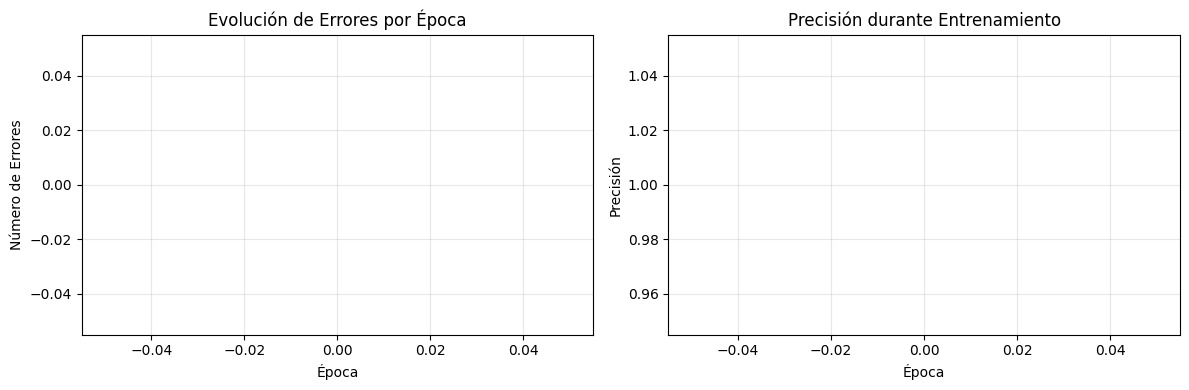

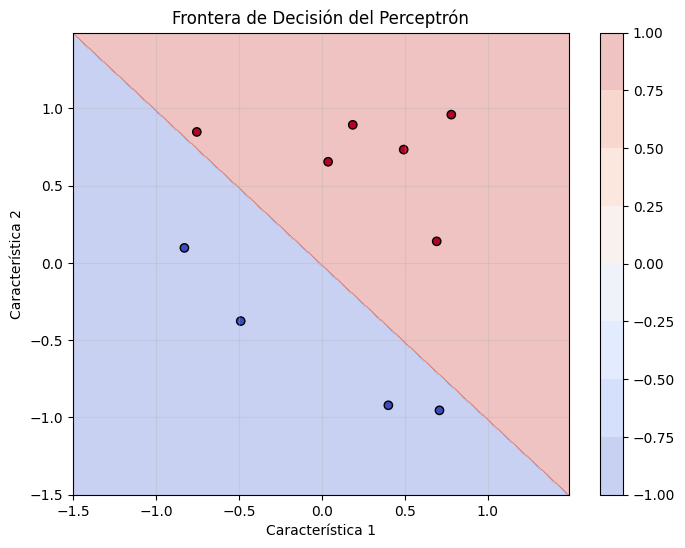


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 1.5314
ρ^2: 0.0090
||w*||^2: 2.0000
Cota teórica: 339.38
¿Se cumple? Sí

#################### Experimento con n=50, p=5####################

INICIO DEL ENTRENAMIENTO
Muestras: 50, Características: 5
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1.]
Bias inicial: 0.2424
--------------------------------------------------
Época   0: Errores =   3, Precisión = 94.0%
Época   5: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 6!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 6
Precisión final: 100.0%
Pesos finales: [0.9745 1.0381 1.0444 1.0571 0.9893]
Bias final: 0.0424
Predicciones: (50,), Verdaderos: (50,)

Matriz de confusión simplificada:
Correctas: 50/50
Incorrectas: 0/50


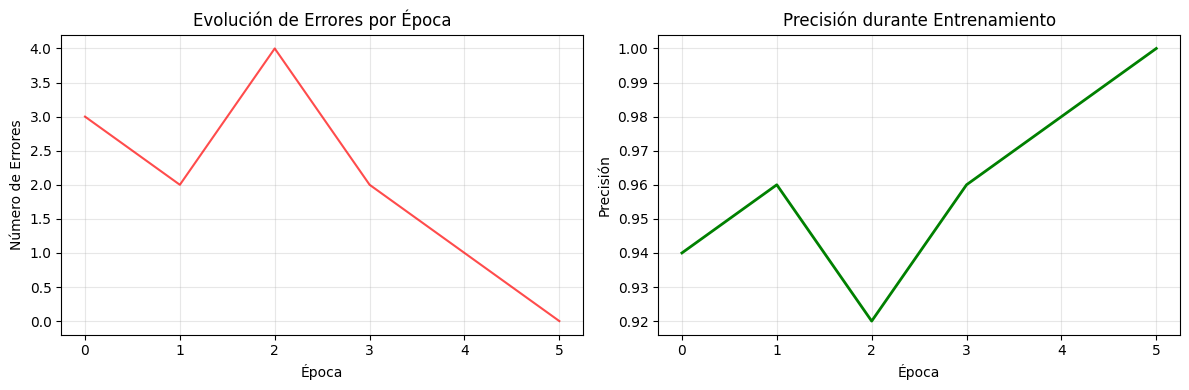


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 3.9789
ρ^2: 0.0000
||w*||^2: 5.2142
Cota teórica: 6966380.07
¿Se cumple? Sí

#################### Experimento con n=100, p=10####################

INICIO DEL ENTRENAMIENTO
Muestras: 100, Características: 10
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Bias inicial: 0.4778
--------------------------------------------------
Época   0: Errores =   3, Precisión = 97.0%
Época   1: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 2!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 2
Precisión final: 100.0%
Pesos finales: [1.2718 0.9394 0.8577 0.9664 0.9861 1.0669 0.9311 0.9429 1.0766 1.0011]
Bias final: 0.1778
Predicciones: (100,), Verdaderos: (100,)

Matriz de confusión simplificada:
Correctas: 100/100
Incorrectas: 0/100


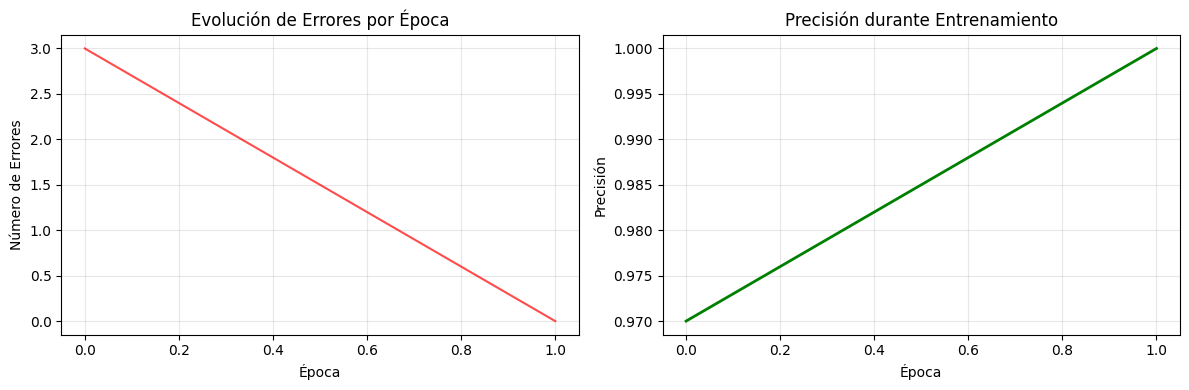


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 5.1447
ρ^2: 0.0183
||w*||^2: 10.1974
Cota teórica: 2867.86
¿Se cumple? Sí

#################### Experimento con n=1000, p=20####################

INICIO DEL ENTRENAMIENTO
Muestras: 1000, Características: 20
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Bias inicial: 0.9573
--------------------------------------------------
Época   0: Errores =  36, Precisión = 96.4%
Época  20: Errores =  20, Precisión = 98.0%
Época  40: Errores =  14, Precisión = 98.6%
Época  60: Errores =  14, Precisión = 98.6%
Época  80: Errores =  13, Precisión = 98.7%
Época 100: Errores =  11, Precisión = 98.9%
Época 120: Errores =  13, Precisión = 98.7%
Época 140: Errores =  16, Precisión = 98.4%
Época 153: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 154!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 154
Precisión final: 100.0%
Pesos finales: [2.4346 2.6841 2.3997 2.5341 2.4233 2.4626 2.5759 2.5

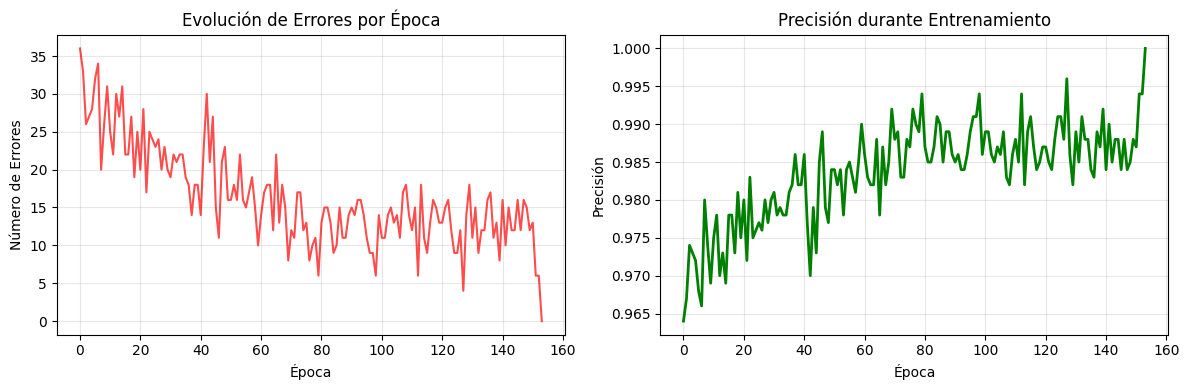


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 11.8692
ρ^2: 0.0012
||w*||^2: 123.9681
Cota teórica: 1213191.38
¿Se cumple? Sí


In [2]:
n = [10, 50, 100, 1000]
p = [2, 5, 10, 20]
epochs = 1000

for ni, pi in zip(n, p):
    print(f"\n{'#'*20} Experimento con n={ni}, p={pi}{'#'*20}")
    x, y, w = Perceptron.linear_sep_data(ni, pi)
    
    perceptron = Perceptron(input_size = pi, learning_rate = 0.05)
    steps = perceptron.train(x, y, w, epochs = epochs, resultados = True)

    perceptron.plot_training_history()
    perceptron.evaluar_cota(x, y, w, steps)


#### Con semilla.



#################### Experimento con n=10, p=2, seed=1 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 10, Características: 2
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1.]
Bias inicial: -0.1724
--------------------------------------------------
Época   0: Errores =   1, Precisión = 90.0%
Época   1: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 2!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 2
Precisión final: 100.0%
Pesos finales: [0.9409 1.0756]
Bias final: -0.0724
Predicciones: (10,), Verdaderos: (10,)

Matriz de confusión simplificada:
Correctas: 10/10
Incorrectas: 0/10


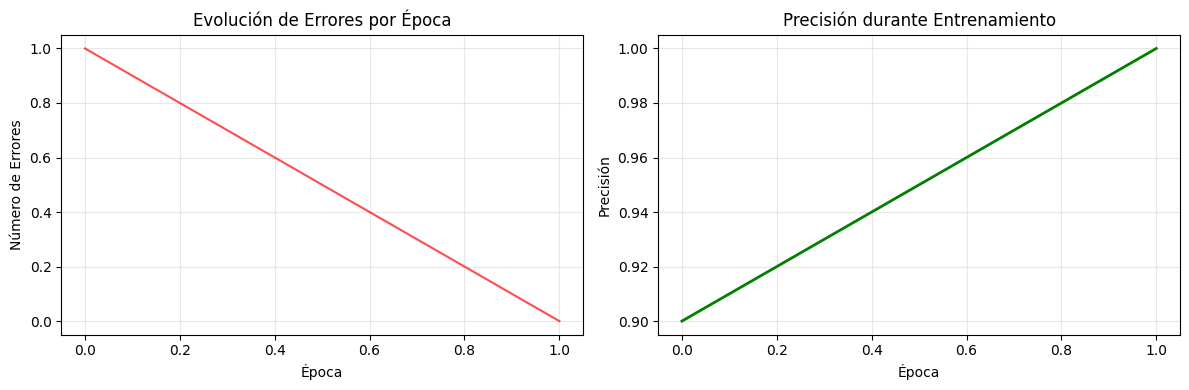

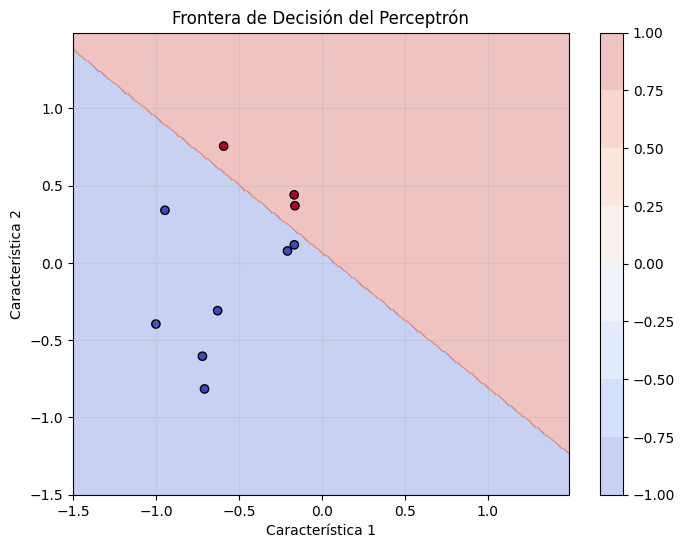


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 1.1639
ρ^2: 0.0009
||w*||^2: 2.0422
Cota teórica: 2757.80
¿Se cumple? Sí


#################### Experimento con n=50, p=5, seed=1 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 50, Características: 5
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1.]
Bias inicial: 1.4075
--------------------------------------------------
Época   0: Errores =  10, Precisión = 80.0%
Época   2: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 3!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 3
Precisión final: 100.0%
Pesos finales: [0.8939 1.2009 1.0775 1.3965 0.9638]
Bias final: 0.2075
Predicciones: (50,), Verdaderos: (50,)

Matriz de confusión simplificada:
Correctas: 50/50
Incorrectas: 0/50


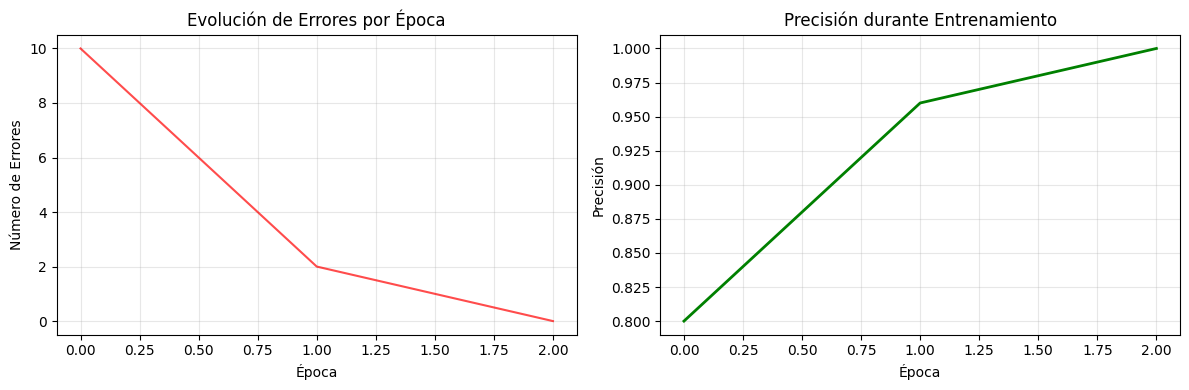


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 3.2794
ρ^2: 0.0032
||w*||^2: 6.2814
Cota teórica: 6536.16
¿Se cumple? Sí


#################### Experimento con n=100, p=10, seed=1 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 100, Características: 10
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Bias inicial: 0.1457
--------------------------------------------------
Época   0: Errores =   2, Precisión = 98.0%
Época   2: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 3!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 3
Precisión final: 100.0%
Pesos finales: [1.0243 0.9572 1.0539 0.9856 0.9365 1.0631 0.9202 1.0451 1.1295 0.9182]
Bias final: 0.0457
Predicciones: (100,), Verdaderos: (100,)

Matriz de confusión simplificada:
Correctas: 100/100
Incorrectas: 0/100


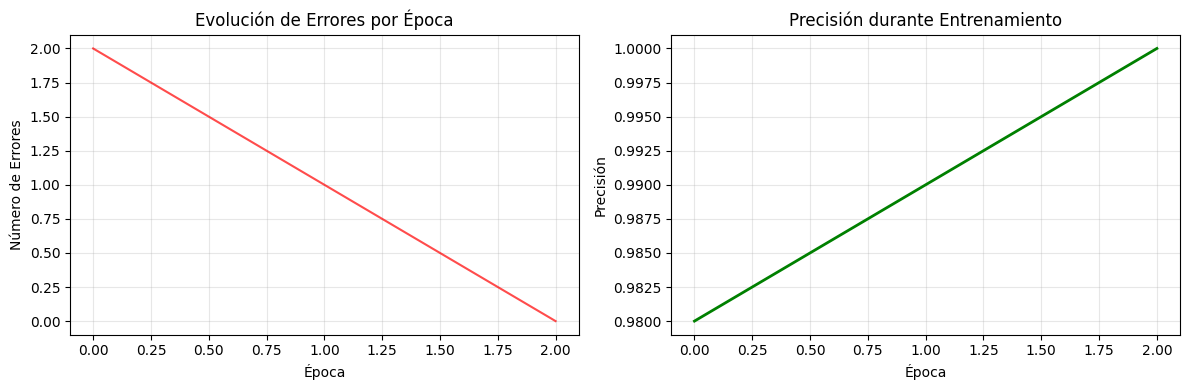


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 5.9369
ρ^2: 0.0036
||w*||^2: 10.1126
Cota teórica: 16718.12
¿Se cumple? Sí


#################### Experimento con n=1000, p=20, seed=1 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 1000, Características: 20
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Bias inicial: 0.8099
--------------------------------------------------
Época   0: Errores =  40, Precisión = 96.0%
Época  20: Errores =  27, Precisión = 97.3%
Época  40: Errores =  20, Precisión = 98.0%
Época  60: Errores =  15, Precisión = 98.5%
Época  80: Errores =  16, Precisión = 98.4%
Época 100: Errores =   5, Precisión = 99.5%
Época 120: Errores =   7, Precisión = 99.3%
Época 140: Errores =  14, Precisión = 98.6%
Época 160: Errores =  12, Precisión = 98.8%
Época 180: Errores =  16, Precisión = 98.4%
Época 199: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 200!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenad

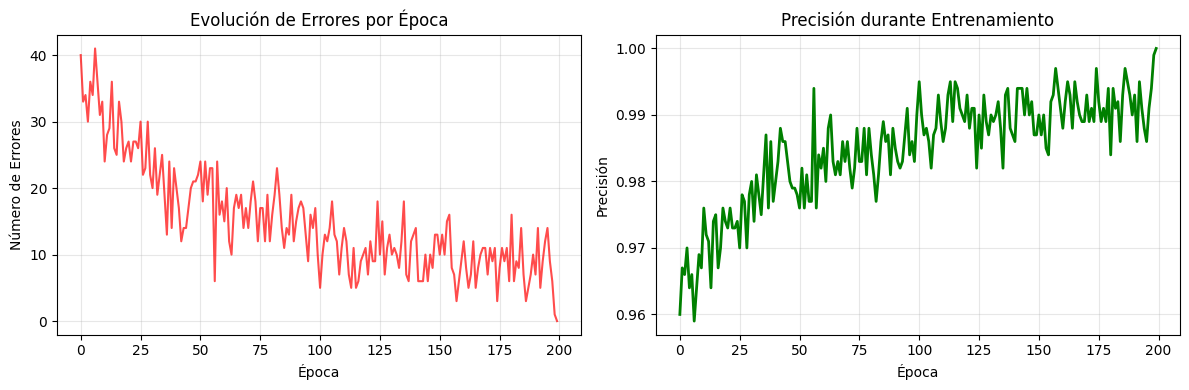


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 11.0367
ρ^2: 0.0000
||w*||^2: 152.4348
Cota teórica: 146730348.06
¿Se cumple? Sí


#################### Experimento con n=10, p=2, seed=42 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 10, Características: 2
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1.]
Bias inicial: -0.9080
--------------------------------------------------
Época   0: Errores =   4, Precisión = 60.0%
Época   4: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 5!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 5
Precisión final: 100.0%
Pesos finales: [1.3075 0.9214]
Bias final: -0.2080
Predicciones: (10,), Verdaderos: (10,)

Matriz de confusión simplificada:
Correctas: 10/10
Incorrectas: 0/10


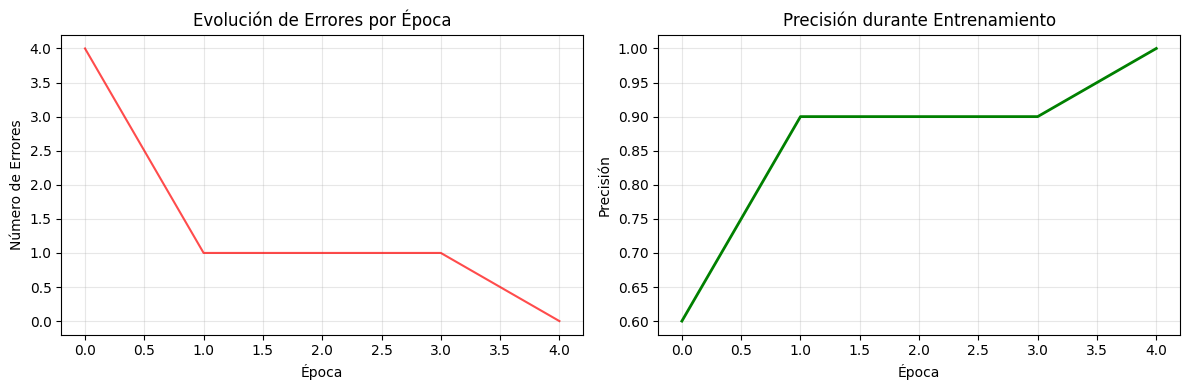

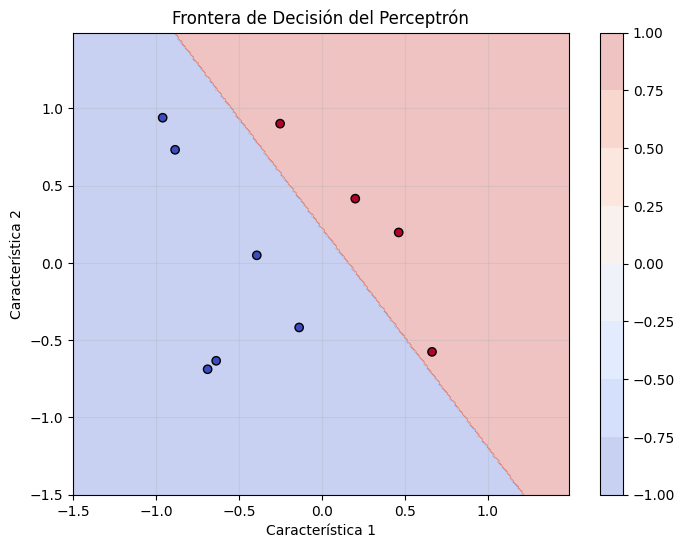


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 1.8026
ρ^2: 0.1151
||w*||^2: 2.5584
Cota teórica: 40.07
¿Se cumple? Sí


#################### Experimento con n=50, p=5, seed=42 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 50, Características: 5
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1.]
Bias inicial: 0.9540
--------------------------------------------------
Época   0: Errores =   6, Precisión = 88.0%
Época   1: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 2!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 2
Precisión final: 100.0%
Pesos finales: [1.2486 1.0246 0.985  0.8586 1.1475]
Bias final: 0.3540
Predicciones: (50,), Verdaderos: (50,)

Matriz de confusión simplificada:
Correctas: 50/50
Incorrectas: 0/50


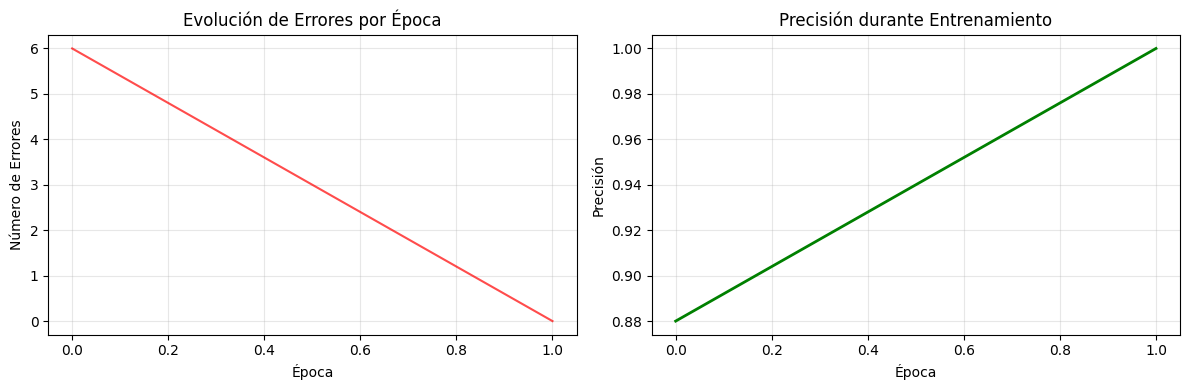


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 3.4244
ρ^2: 0.0143
||w*||^2: 5.6331
Cota teórica: 1348.33
¿Se cumple? Sí


#################### Experimento con n=100, p=10, seed=42 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 100, Características: 10
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Bias inicial: -0.2811
--------------------------------------------------
Época   0: Errores =   2, Precisión = 98.0%
Época   1: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 2!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 2
Precisión final: 100.0%
Pesos finales: [1.0187 1.0249 1.0566 0.9145 0.9245 1.0157 0.8642 1.1068 1.1408 0.9431]
Bias final: -0.0811
Predicciones: (100,), Verdaderos: (100,)

Matriz de confusión simplificada:
Correctas: 100/100
Incorrectas: 0/100


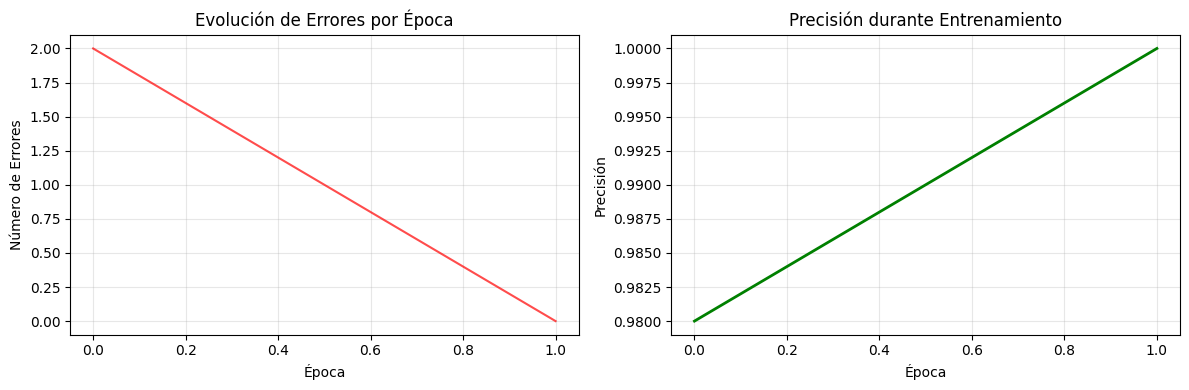


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 5.8783
ρ^2: 0.0009
||w*||^2: 10.0899
Cota teórica: 65382.43
¿Se cumple? Sí


#################### Experimento con n=1000, p=20, seed=42 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 1000, Características: 20
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Bias inicial: -0.7275
--------------------------------------------------
Época   0: Errores =  43, Precisión = 95.7%
Época  20: Errores =  26, Precisión = 97.4%
Época  40: Errores =  28, Precisión = 97.2%
Época  60: Errores =  17, Precisión = 98.3%
Época  80: Errores =  15, Precisión = 98.5%
Época 100: Errores =  11, Precisión = 98.9%
Época 120: Errores =  12, Precisión = 98.8%
Época 140: Errores =   9, Precisión = 99.1%
Época 160: Errores =  15, Precisión = 98.5%
Época 174: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 175!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 175
Precisión final: 100.0%
Pesos fina

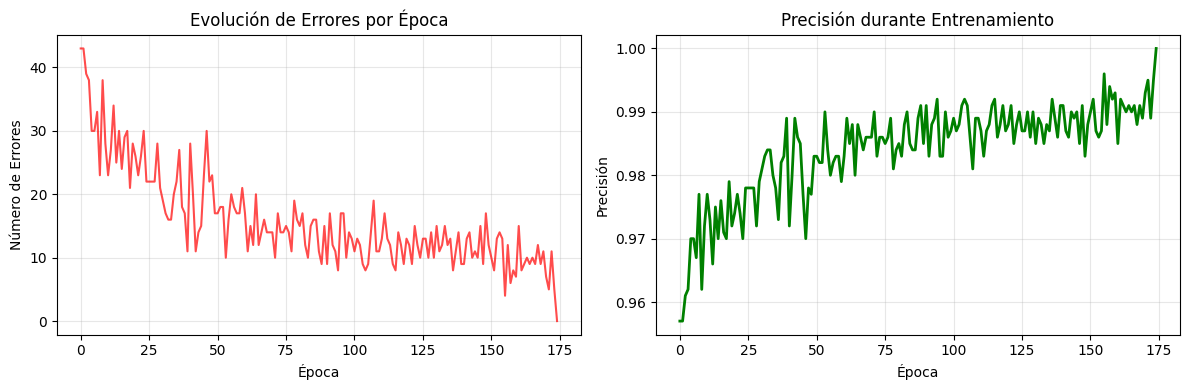


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 11.1529
ρ^2: 0.0013
||w*||^2: 139.4755
Cota teórica: 1162353.57
¿Se cumple? Sí


#################### Experimento con n=10, p=2, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 10, Características: 2
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1.]
Bias inicial: -0.5313
--------------------------------------------------
Época   0: Errores =   3, Precisión = 70.0%
Época   1: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 2!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 2
Precisión final: 100.0%
Pesos finales: [1.0854 0.9924]
Bias final: -0.2313
Predicciones: (10,), Verdaderos: (10,)

Matriz de confusión simplificada:
Correctas: 10/10
Incorrectas: 0/10


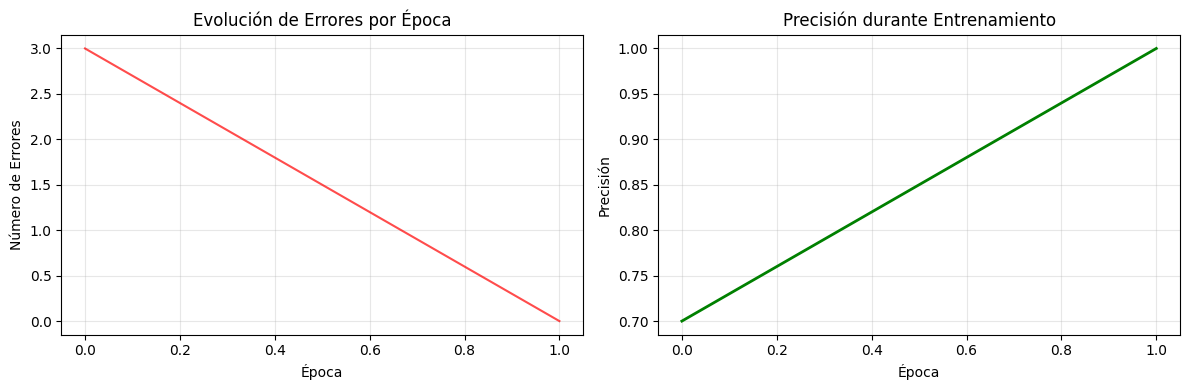

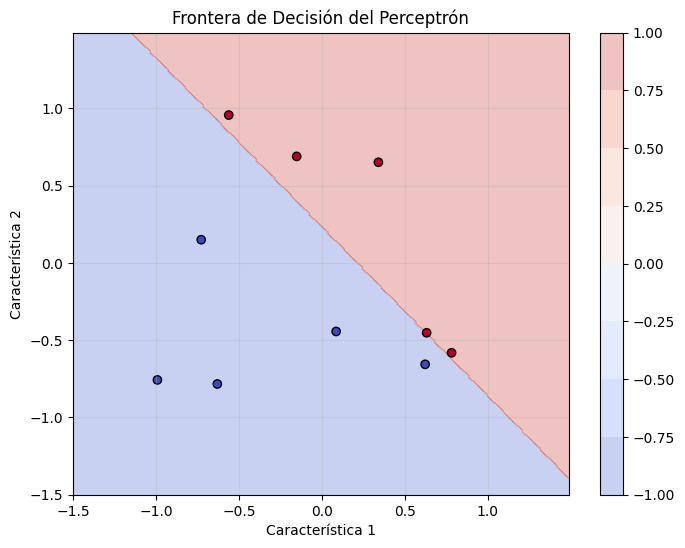


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 1.5541
ρ^2: 0.0007
||w*||^2: 2.1630
Cota teórica: 5163.83
¿Se cumple? Sí


#################### Experimento con n=50, p=5, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 50, Características: 5
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1.]
Bias inicial: 0.4235
--------------------------------------------------
Época   0: Errores =   3, Precisión = 94.0%
Época   1: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 2!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 2
Precisión final: 100.0%
Pesos finales: [0.8979 1.1363 0.9336 0.9916 1.0853]
Bias final: 0.1235
Predicciones: (50,), Verdaderos: (50,)

Matriz de confusión simplificada:
Correctas: 50/50
Incorrectas: 0/50


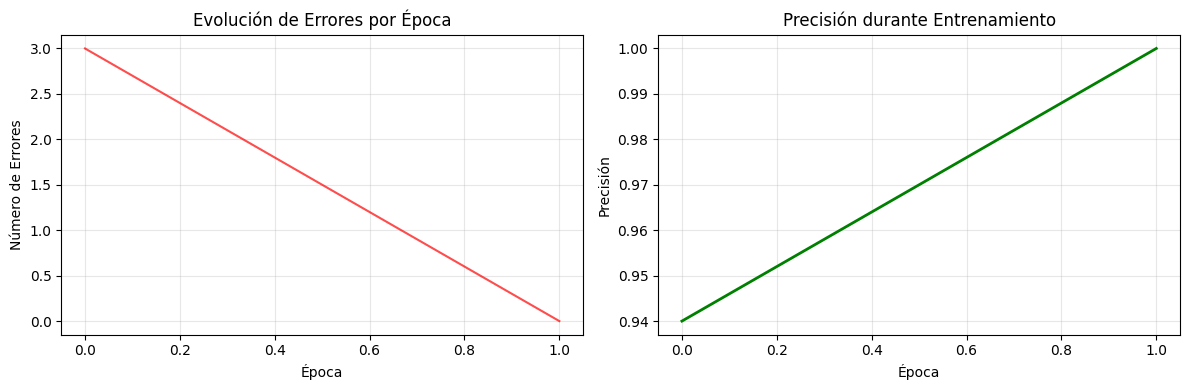


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 3.7790
ρ^2: 0.0012
||w*||^2: 5.1302
Cota teórica: 15516.12
¿Se cumple? Sí


#################### Experimento con n=100, p=10, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 100, Características: 10
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Bias inicial: -0.1643
--------------------------------------------------
Época   0: Errores =   6, Precisión = 94.0%
Época   1: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 2!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 2
Precisión final: 100.0%
Pesos finales: [0.9351 0.9977 0.9032 1.1609 1.0185 1.0766 1.0113 0.9793 1.0196 0.933 ]
Bias final: 0.0357
Predicciones: (100,), Verdaderos: (100,)

Matriz de confusión simplificada:
Correctas: 100/100
Incorrectas: 0/100


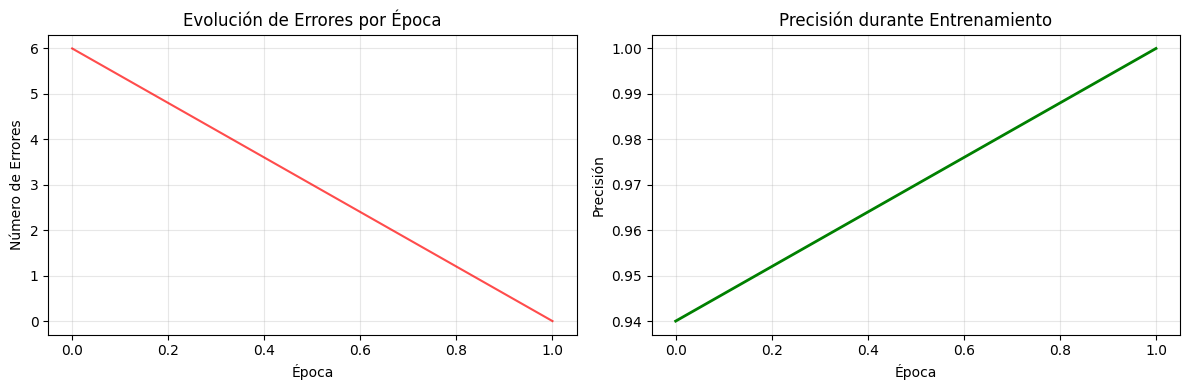


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 6.2983
ρ^2: 0.0000
||w*||^2: 10.1216
Cota teórica: 3383015.66
¿Se cumple? Sí


#################### Experimento con n=1000, p=20, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 1000, Características: 20
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Bias inicial: 0.0766
--------------------------------------------------
Época   0: Errores =  31, Precisión = 96.9%
Época  20: Errores =  19, Precisión = 98.1%
Época  40: Errores =  18, Precisión = 98.2%
Época  60: Errores =  14, Precisión = 98.6%
Época  80: Errores =  11, Precisión = 98.9%
Época 100: Errores =  13, Precisión = 98.7%
Época 120: Errores =  15, Precisión = 98.5%
Época 140: Errores =  16, Precisión = 98.4%
Época 160: Errores =  10, Precisión = 99.0%
Época 180: Errores =  11, Precisión = 98.9%
Época 200: Errores =  10, Precisión = 99.0%
Época 220: Errores =  10, Precisión = 99.0%
Época 240: Errores =   8, Precisión 

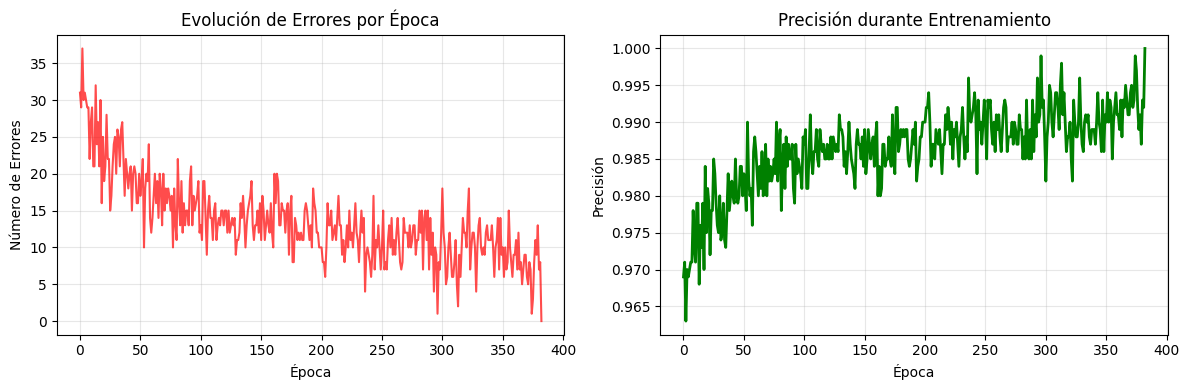


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 10.9538
ρ^2: 0.0005
||w*||^2: 224.4109
Cota teórica: 4942550.80
¿Se cumple? Sí


#################### Experimento con n=10, p=2, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 10, Características: 2
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1.]
Bias inicial: -0.5313
--------------------------------------------------
Época   0: Errores =   3, Precisión = 70.0%
Época   1: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 2!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 2
Precisión final: 100.0%
Pesos finales: [1.0854 0.9924]
Bias final: -0.2313
Predicciones: (10,), Verdaderos: (10,)

Matriz de confusión simplificada:
Correctas: 10/10
Incorrectas: 0/10


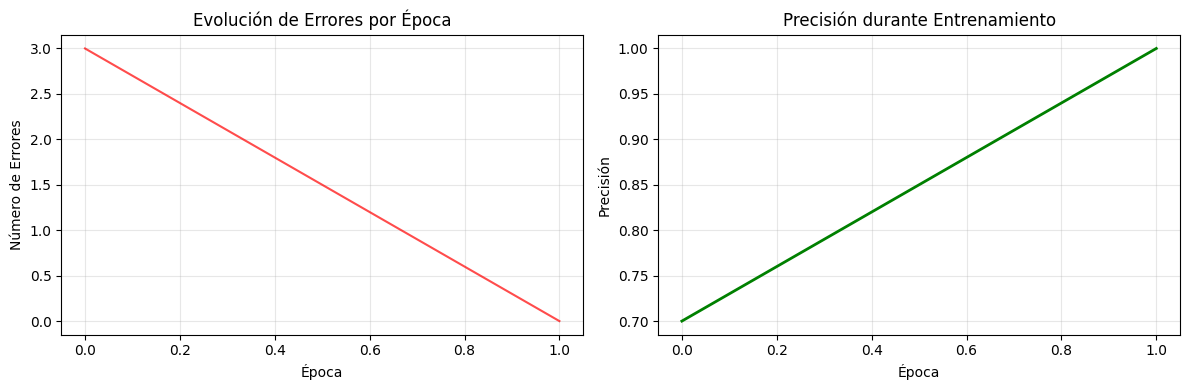

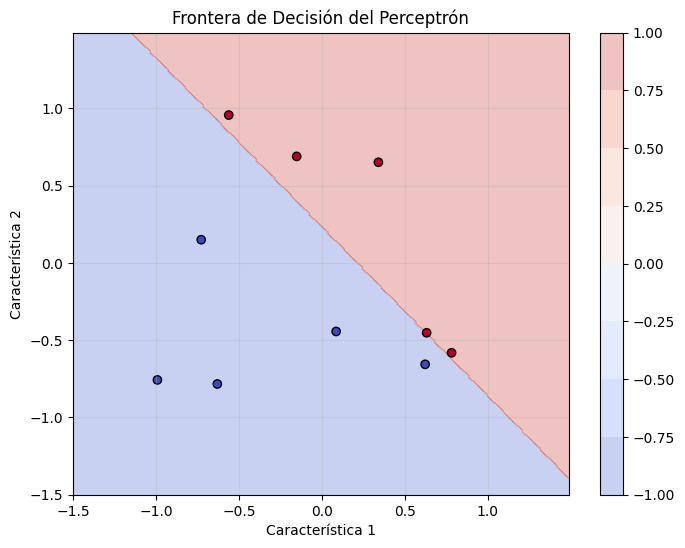


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 1.5541
ρ^2: 0.0007
||w*||^2: 2.1630
Cota teórica: 5163.83
¿Se cumple? Sí


#################### Experimento con n=50, p=5, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 50, Características: 5
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1.]
Bias inicial: 0.4235
--------------------------------------------------
Época   0: Errores =   3, Precisión = 94.0%
Época   1: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 2!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 2
Precisión final: 100.0%
Pesos finales: [0.8979 1.1363 0.9336 0.9916 1.0853]
Bias final: 0.1235
Predicciones: (50,), Verdaderos: (50,)

Matriz de confusión simplificada:
Correctas: 50/50
Incorrectas: 0/50


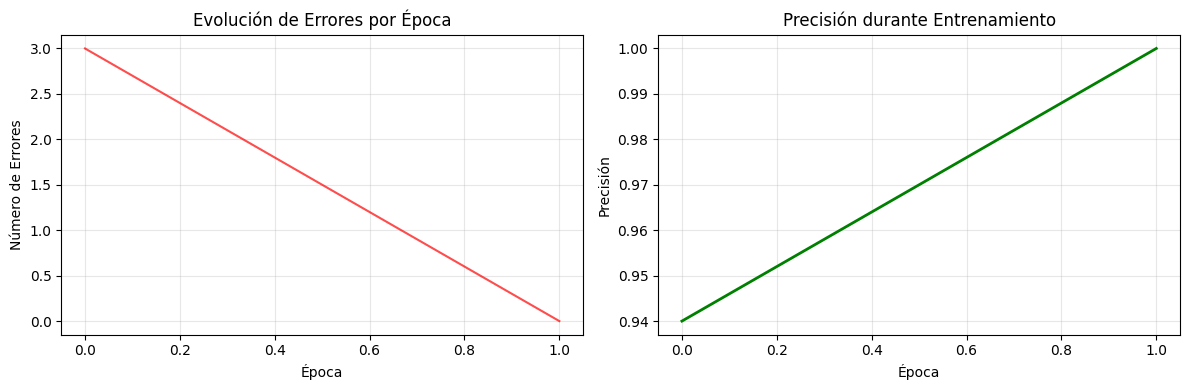


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 3.7790
ρ^2: 0.0012
||w*||^2: 5.1302
Cota teórica: 15516.12
¿Se cumple? Sí


#################### Experimento con n=100, p=10, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 100, Características: 10
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Bias inicial: -0.1643
--------------------------------------------------
Época   0: Errores =   6, Precisión = 94.0%
Época   1: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 2!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 2
Precisión final: 100.0%
Pesos finales: [0.9351 0.9977 0.9032 1.1609 1.0185 1.0766 1.0113 0.9793 1.0196 0.933 ]
Bias final: 0.0357
Predicciones: (100,), Verdaderos: (100,)

Matriz de confusión simplificada:
Correctas: 100/100
Incorrectas: 0/100


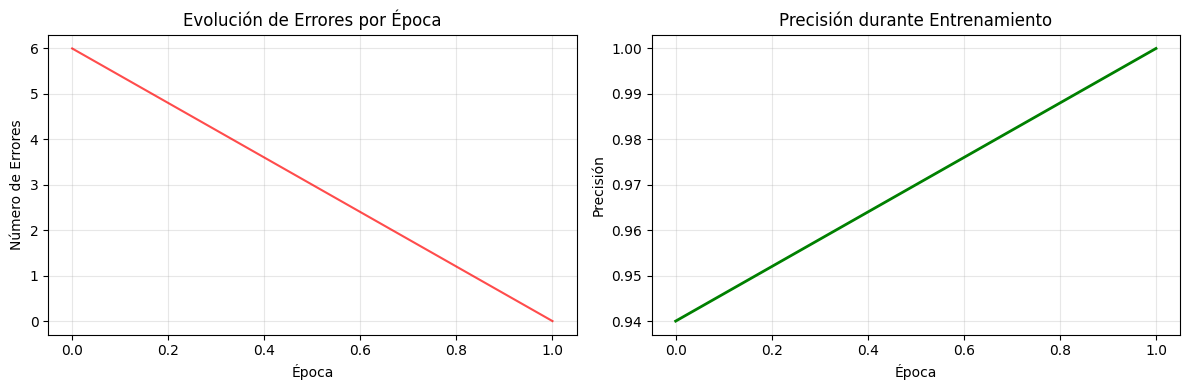


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 6.2983
ρ^2: 0.0000
||w*||^2: 10.1216
Cota teórica: 3383015.66
¿Se cumple? Sí


#################### Experimento con n=1000, p=20, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 1000, Características: 20
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Bias inicial: 0.0766
--------------------------------------------------
Época   0: Errores =  31, Precisión = 96.9%
Época  20: Errores =  19, Precisión = 98.1%
Época  40: Errores =  18, Precisión = 98.2%
Época  60: Errores =  14, Precisión = 98.6%
Época  80: Errores =  11, Precisión = 98.9%
Época 100: Errores =  13, Precisión = 98.7%
Época 120: Errores =  15, Precisión = 98.5%
Época 140: Errores =  16, Precisión = 98.4%
Época 160: Errores =  10, Precisión = 99.0%
Época 180: Errores =  11, Precisión = 98.9%
Época 200: Errores =  10, Precisión = 99.0%
Época 220: Errores =  10, Precisión = 99.0%
Época 240: Errores =   8, Precisión 

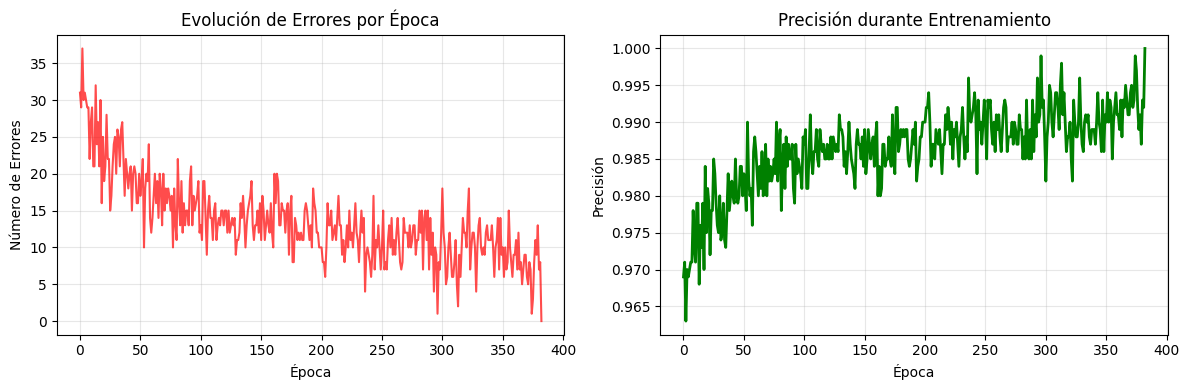


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 10.9538
ρ^2: 0.0005
||w*||^2: 224.4109
Cota teórica: 4942550.80
¿Se cumple? Sí


#################### Experimento con n=10, p=2, seed=2024 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 10, Características: 2
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1.]
Bias inicial: 0.9437
--------------------------------------------------
Época   0: Errores =   3, Precisión = 70.0%
Época   6: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 7!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 7
Precisión final: 100.0%
Pesos finales: [1.1377 1.0665]
Bias final: 0.1437
Predicciones: (10,), Verdaderos: (10,)

Matriz de confusión simplificada:
Correctas: 10/10
Incorrectas: 0/10


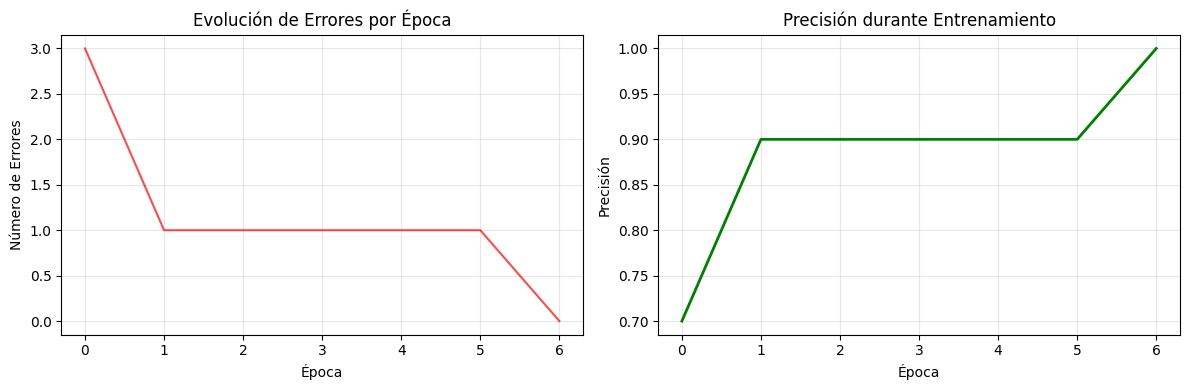

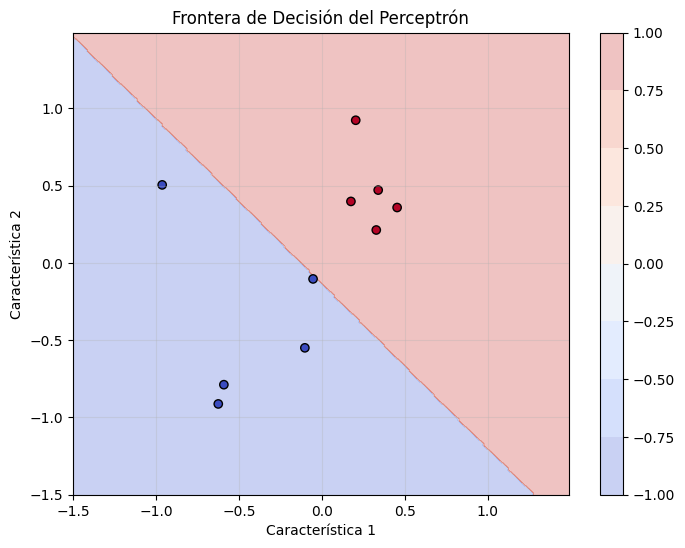


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 1.2214
ρ^2: 0.0288
||w*||^2: 2.4318
Cota teórica: 103.03
¿Se cumple? Sí


#################### Experimento con n=50, p=5, seed=2024 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 50, Características: 5
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1.]
Bias inicial: -0.5674
--------------------------------------------------
Época   0: Errores =   5, Precisión = 90.0%
Época   1: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 2!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 2
Precisión final: 100.0%
Pesos finales: [1.0951 1.0369 0.9938 1.1088 0.8652]
Bias final: -0.0674
Predicciones: (50,), Verdaderos: (50,)

Matriz de confusión simplificada:
Correctas: 50/50
Incorrectas: 0/50


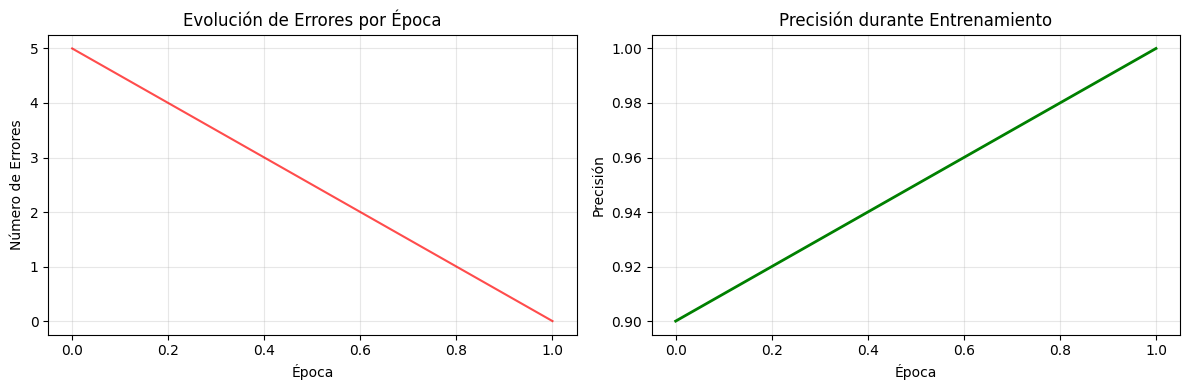


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 3.4123
ρ^2: 0.0025
||w*||^2: 5.2401
Cota teórica: 7145.23
¿Se cumple? Sí


#################### Experimento con n=100, p=10, seed=2024 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 100, Características: 10
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Bias inicial: -1.0874
--------------------------------------------------
Época   0: Errores =  10, Precisión = 90.0%
Época   2: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 3!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 3
Precisión final: 100.0%
Pesos finales: [0.9234 1.0459 1.1423 1.1345 1.0256 1.3254 0.8512 0.8884 0.9705 1.1155]
Bias final: -0.0874
Predicciones: (100,), Verdaderos: (100,)

Matriz de confusión simplificada:
Correctas: 100/100
Incorrectas: 0/100


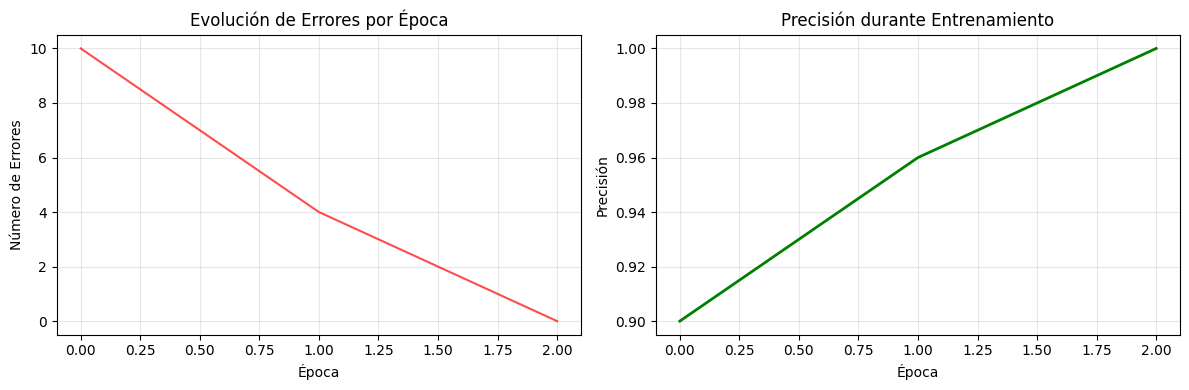


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 5.9541
ρ^2: 0.0008
||w*||^2: 11.0469
Cota teórica: 86879.90
¿Se cumple? Sí


#################### Experimento con n=1000, p=20, seed=2024 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 1000, Características: 20
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Bias inicial: -0.6893
--------------------------------------------------
Época   0: Errores =  34, Precisión = 96.6%
Época  20: Errores =  32, Precisión = 96.8%
Época  40: Errores =  27, Precisión = 97.3%
Época  60: Errores =  20, Precisión = 98.0%
Época  80: Errores =  12, Precisión = 98.8%
Época 100: Errores =  16, Precisión = 98.4%
Época 120: Errores =  17, Precisión = 98.3%
Época 140: Errores =   9, Precisión = 99.1%
Época 160: Errores =  13, Precisión = 98.7%
Época 180: Errores =  16, Precisión = 98.4%
Época 200: Errores =  12, Precisión = 98.8%
Época 220: Errores =   8, Precisión = 99.2%
Época 240: Errores =  16, Precisión 

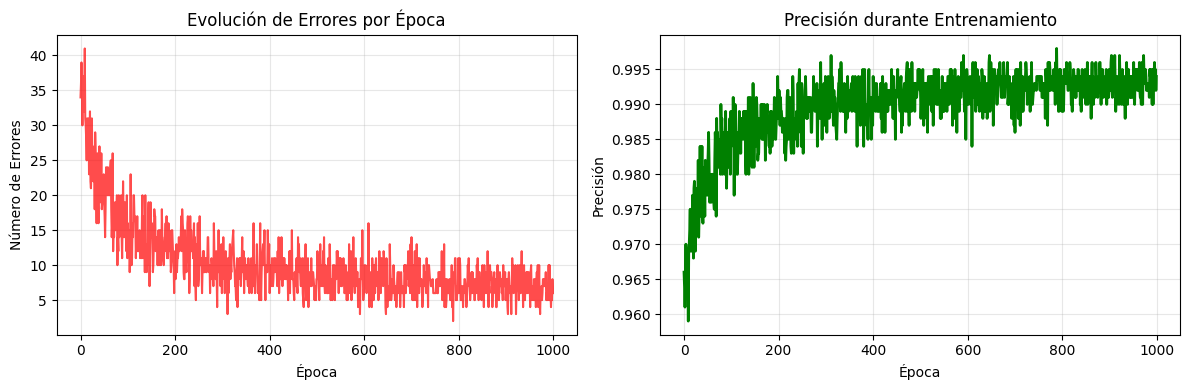


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 11.5730
ρ^2: 0.2189
||w*||^2: 444.7052
Cota teórica: 23506.09
¿Se cumple? Sí


In [3]:
random_seeds = [1, 42, 100, 100, 2024]

for seed in random_seeds:
    np.random.seed(seed)

    for ni, pi in zip(n, p):
        print(f"\n\n{'#'*20} Experimento con n={ni}, p={pi}, seed={seed} {'#'*20}\n")
        x, y, w = Perceptron.linear_sep_data(ni, pi)

        perceptron = Perceptron(input_size = pi, learning_rate = 0.05)
        steps = perceptron.train(x, y, w, epochs = epochs, resultados = True)

        perceptron.plot_training_history()
        perceptron.evaluar_cota(x, y, w, steps)


## Dataset Bank Note Authentication.


INICIO DEL ENTRENAMIENTO
Muestras: 1372, Características: 4
Tasa de aprendizaje: 0.05
Pesos iniciales: [1. 1. 1. 1.]
Bias inicial: -0.4072
--------------------------------------------------
Época   0: Errores = 792, Precisión = 42.3%
Época  20: Errores = 774, Precisión = 43.6%
Época  40: Errores = 771, Precisión = 43.8%
Época  60: Errores = 773, Precisión = 43.7%
Época  80: Errores = 766, Precisión = 44.2%
Época 100: Errores = 775, Precisión = 43.5%
Época 120: Errores = 771, Precisión = 43.8%
Época 140: Errores = 782, Precisión = 43.0%
Época 160: Errores = 771, Precisión = 43.8%
Época 180: Errores = 780, Precisión = 43.1%
Época 200: Errores = 765, Precisión = 44.2%
Época 220: Errores = 772, Precisión = 43.7%
Época 240: Errores = 762, Precisión = 44.5%
Época 260: Errores = 770, Precisión = 43.9%
Época 280: Errores = 773, Precisión = 43.7%
Época 300: Errores = 772, Precisión = 43.7%
Época 320: Errores = 767, Precisión = 44.1%
Época 340: Errores = 766, Precisión = 44.2%
Época 360: Errore

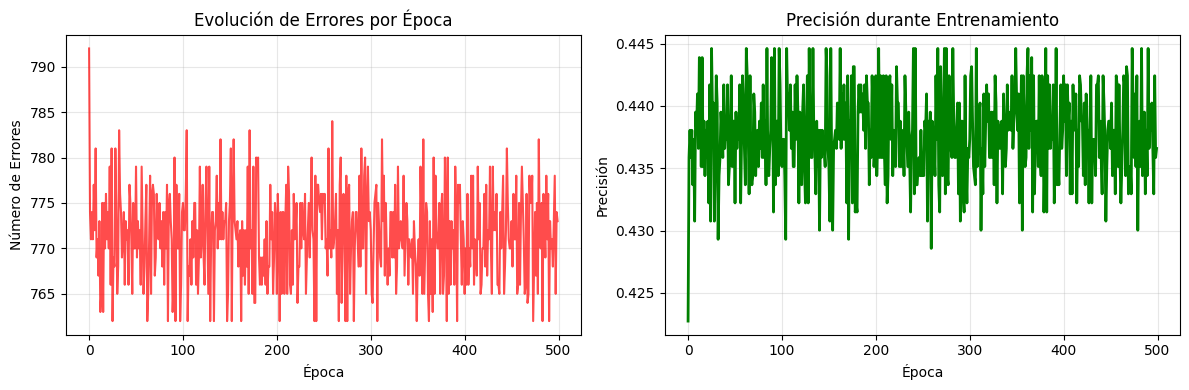


EVALUACIÓN DE LA COTA TEÓRICA
R^2: 526.6399
ρ^2: 2.2380
||w*||^2: 0.7815
Cota teórica: 183.89
¿Se cumple? No


In [5]:
import pandas as pd

data = '../data/raw/perceptron/banknote_auth.csv'
df_bank = pd.read_csv(data)

x = df_bank.iloc[:, :-1].to_numpy()
y = df_bank.iloc[:, -1].to_numpy()

n, p = x.shape
w = np.ones((p, 1))

perceptron = Perceptron(input_size = p, learning_rate = 0.05)
print(f"Seed: {seed}, convergence epoch: {perceptron.train(x, y, w, epochs = 500,  resultados = True)}")
perceptron.plot_training_history()
perceptron.evaluar_cota(x, y, w, steps)